In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<b><font sixe="8" color="red">ch11.데이터프레임과 시리즈(pandas) </font></b>

# 1절 판다스 패키지
- 데이터 분석을 위해 반드시 알아야 할 패키지. 넘파이 기반으로 다른 많은 라이브러리와 잘 통합되도록 설계 
- 1차원 구조를 가지는 시리즈, 2차원 구조를 가지는 데이터프레임(엑셀의 스프레드시트)을 제공
- 판다스 장점: 파일 io, 부분 데이터 추추, 킈변경, 데이터분할, 병합, 결측치 처리, 데이터분할, 피벗과 언피벗(와이드 포맷과 롱포맷)에 용이 
- [pandas API reference] (https://pandas.pydata.org/docs/reference/index.html)
- [pandas docs] (https://pandas.pydata.org/docs/)

In [37]:
import pandas as pd
pd.__version__

'1.5.3'

In [7]:
data = pd.read_csv('data/ch09_member4.csv')
display(data)

,name,age,email,address
0,홍길동,22,a@a.com,신림동
1,신길동,32,b@a.com,신림동
2,김길동,42,c@a.com,신림동


In [11]:
data = pd.read_csv('data/ch09_member1.csv',header=None, 
                    names=['name','age','email','address'])
data
data.head(2) #최초 상위 2줄 

,name,age,email,address
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구


In [14]:
data = pd.read_json('data/ch09_member1.json') #기본값이 utf-8
data

,name,age,email,address
0,홍길동,22,a@a.com,서울
1,신길동,32,a@a.com,서울
2,김길동,42,a@a.com,서울


In [17]:
iris = pd.read_hdf('data/ch09_iris.hdf5', key = 'iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 2절 데이터 프레임 만들기
## 2.1 딕셔너리를 이용해서 데이터프레임 열기

In [18]:
d= {'kor':[100,90], 'mat':[95,99]} #딕셔너리를 데이터프레임으로
df = pd.DataFrame(data=d)
df

,kor,mat
0,100,95
1,90,99


In [19]:
df.to_dict()

{'kor': {0: 100, 1: 90}, 'mat': {0: 95, 1: 99}}

In [20]:
df.to_numpy()

array([[100,  95],
       [ 90,  99]], dtype=int64)

In [22]:
#딕셔너리 라스트를 데이터프레임
d= [{'kor':100, 'mat':95} ,{'kor':90, 'mat':99}]
df = pd.DataFrame(data=d)
df

,kor,mat
0,100,95
1,90,99


In [24]:
df.dtypes

kor    int64
mat    int64
dtype: object

In [25]:
df.info() # 얘를 더 많이씀 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   kor     2 non-null      int64
 1   mat     2 non-null      int64
dtypes: int64(2)
memory usage: 160.0 bytes


In [29]:
d= [{'kor':100, 'mat':95} ,{'kor':90, 'mat':99}, {'kor':93, 'eng':100}]
df = pd.DataFrame(data=d)   #결측치는 실수형 , 정수형변환 불가(경측치대체를 한후 정수형 변화)
df

,kor,mat,eng
0,100,95.0,NaN
1,90,99.0,NaN
2,93,NaN,100.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     3 non-null      int64  
 1   mat     2 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 176.0 bytes


## 2.2 리스트를 이용해서 데이터 프레임 열기

In [35]:
title = ['책1','책2','책3']
price = [15000, 18000, 10000]
df = pd.DataFrame(data={'title':title, 'price':price})
df

,title,price
0,책1,15000
1,책2,18000
2,책3,10000


In [36]:
import numpy as np
np.c_[title, price]

array([['책1', '15000'],
       ['책2', '18000'],
       ['책3', '10000']], dtype='<U11')

In [37]:
df = pd.DataFrame(np.c_[title, price], columns=['책이름','가격'])
df

,책이름,가격
0,책1,15000
1,책2,18000
2,책3,10000


In [34]:
l= [['책1',15000],
    ['책2',18000],
   ['책3',10000]]
df = pd.DataFrame(l,columns=['책이름','가격'])
df

,책이름,가격
0,책1,15000
1,책2,18000
2,책3,10000


In [40]:
%ls C:\ai_x\download\상가정보_20250331

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3664-591E

 C:\ai_x\download\상가정보_20250331 디렉터리

2025-04-28  오후 03:53    <DIR>          .
2025-04-28  오후 03:53    <DIR>          ..
2025-04-27  오후 11:07             1,011 [필독]파일열람방법.txt
2025-04-27  오후 11:07        61,227,944 소상공인시장진흥공단_상가(상권)정보_강원_202503.csv
2025-04-27  오후 11:07       356,572,082 소상공인시장진흥공단_상가(상권)정보_경기_202503.csv
2025-04-27  오후 11:07        93,472,559 소상공인시장진흥공단_상가(상권)정보_경남_202503.csv
2025-04-27  오후 11:07        76,425,275 소상공인시장진흥공단_상가(상권)정보_경북_202503.csv
2025-04-27  오후 11:07        40,070,868 소상공인시장진흥공단_상가(상권)정보_광주_202503.csv
2025-04-27  오후 11:07        61,715,005 소상공인시장진흥공단_상가(상권)정보_대구_202503.csv
2025-04-27  오후 11:07        41,491,092 소상공인시장진흥공단_상가(상권)정보_대전_202503.csv
2025-04-27  오후 11:07        84,550,600 소상공인시장진흥공단_상가(상권)정보_부산_202503.csv
2025-04-27  오후 11:07       294,549,483 소상공인시장진흥공단_상가(상권)정보_서울_202503.csv
2025-04-27  오후 11:07         9,303,432 소상공인시장진흥공단_상가(상권)정보_세종_202503.csv
2025-04-27  오후 11:07        28,457,489 소상공인시장진흥공단

In [46]:
df= pd.read_csv(r'C:/ai_x/download/상가정보_20250331/소상공인시장진흥공단_상가(상권)정보_경기_202503.csv',
                low_memory=False,
                nrows=30) #처음 30행만
                
df.shape

(30, 39)

In [47]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000037,PENIEL,NaN,G2,소매,G217,시계·귀금속 소매,G21701,시계/귀금속 소매업,G47830,...,4115010100101320039021620,NaN,경기도 의정부시 시민로 132-1,480011,11697,NaN,NaN,NaN,127.049748,37.737903


In [49]:
#판다스 디스플레이 옵션 
pd.options.display.max_columns = 40 #39열까지 display 가능(기본값20)
pd.options.display.max_rows = 40 #40행까지 display 가능(기본값 60)

In [50]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000037,PENIEL,NaN,G2,소매,G217,시계·귀금속 소매,G21701,시계/귀금속 소매업,G47830,시계 및 귀금속 소매업,41,경기도,41150,의정부시,41150510,의정부1동,4115010100,의정부동,4115010100101320039,1,대지,132,39.0,경기도 의정부시 의정부동 132-39,411503181060,경기도 의정부시 시민로,132,1.0,4115010100101320039021620,NaN,경기도 의정부시 시민로 132-1,480011,11697,NaN,NaN,NaN,127.049748,37.737903


In [76]:
#(1) CSV 파일 불러오기(기본값)
# encoding = utf-8, sep=',' csv파일의 첫번째 줄을 header #이 있는 줄도 데이터로 인식
member = pd.read_csv('data/ch11_member.csv')
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01


In [77]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int64 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int64(1), object(4)
memory usage: 368.0+ bytes


In [78]:
# 형변환 Age열:int64 -> int16
member['Age'] = member['Age'].astype(np.int16) # 'int' : np.int32
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int16 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int16(1), object(4)
memory usage: 332.0+ bytes


In [80]:
# 형변환 Birth열 : object(문자) -> datetime64
member['Birth_as'] = member['Birth'].astype('datetime64[ns]')
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      6 non-null      object        
 1   Age       6 non-null      int16         
 2   Email     6 non-null      object        
 3   Address   6 non-null      object        
 4   Birth     6 non-null      object        
 5   Birth_as  6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int16(1), object(4)
memory usage: 380.0+ bytes


In [55]:
member['Birth_to'] = pd.to_datetime(member['Birth']) #astype() 함수보다 안전한 형변환 
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      6 non-null      object        
 1   Age       6 non-null      int16         
 2   Email     6 non-null      object        
 3   Address   6 non-null      object        
 4   Birth     6 non-null      object        
 5   Birth_as  6 non-null      datetime64[ns]
 6   Birth_to  6 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int16(1), object(4)
memory usage: 428.0+ bytes


In [56]:
# (2) 특정행 제외하고 csv파일읽기
member = pd.read_csv('data/ch11_membercp949.csv',
                    encoding='cp949',
                    skiprows=[1, 6]) # 1,6번째 행은 제외하고 읽어오기
member

,Name,Age,Email,Address,Birth
0,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
1,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
2,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
3,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [81]:
# (3) 주석(#)제외, datetime형 필드 지정하여 읽기
member = pd.read_csv('data/ch11_membertab.csv',
                    sep='\t',
                    comment='#',
                    parse_dates=['Birth']) # datetime형으로 읽어올 필드 지정
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     5 non-null      object        
 1   Age      5 non-null      int64         
 2   Email    5 non-null      object        
 3   Address  5 non-null      object        
 4   Birth    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 328.0+ bytes


In [71]:
# (4) sep='|', 상위5행만 읽어오기
member = pd.read_csv('data/ch11_membersep.csv',
                    sep='|',
                    nrows=5)
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 2.4 패키지에서 가져오기 : iris 데이터
- iris 가져오기 방법 1 : sklearn(머신러닝패키지)
-  iris 가져오기 방법 2: statsmodels (R데이터)
-  iris 가져오기 방법 3: seaborn(시각화패키지)

##  iris 가져오기 방법 1 : sklearn(머신러닝패키지)

In [58]:
from sklearn import datasets
#sklearn : 머신러닝패키지(전처리,머신러닝, 성능평가를 위한 함수, 학습데이터셋)
iris = datasets.load_iris()
iris.keys() #딕셔너리 형태 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [59]:
iris.data #독립변수
iris['data'][:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [61]:
iris.feature_names #독립변수 열이름
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [74]:
#데이터 프레임에서 열이름 
columns = [col[:-5].replace(' ','_') for col in iris.feature_names]+['spacies']

In [64]:
iris.target
iris['target'] #머신러닝 시 종속변수

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [65]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [66]:
iris.target_names[iris.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [67]:
#독립변수
data = iris.data
target = iris.target_names[iris.target]
data.shape, target.shape #독립변수와 종속변수의 차원

((150, 4), (150,))

In [75]:
# 독립변수와 종속변수를 stack한 후 데이터 프레임으로
pd.DataFrame(data = np.hstack( (data, target.reshape(-1,1) ) ),
            columns=columns)

,sepal_length,sepal_width,petal_length,petal_width,spacies
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 가져오기 방법2: statsmodels(R데이터)

In [3]:
from statsmodels.datasets import get_rdataset
iris_dataset = get_rdataset('iris',
                           package = 'datasets', #R의 datasets 패키지에서 가져오고
                           cache=True) #한번 다운로드한 데이터셋을 PC 저장
iris_dataset

<class 'statsmodels.datasets.utils.Dataset'>

In [4]:
iris = iris_dataset.data
iris.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [5]:
[col for col in iris.columns]

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [17]:
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


## iris 가져오기 방법 3: seaborn(시각화 패키지)

In [7]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [13]:
# 데이터 프레임을 csv 파일로
iris.to_csv('data/ch11_iris.csv',
           # sep= ',',encoding = "utf-8",#기본값
           index = False) #행이름을 제외하고 파일 출력

In [2]:
import pandas as pd
load_iris = pd.read_csv('data/ch11_iris.csv')
load_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [15]:
#데이터 프레임을 압축파일(.zip, .gz , .bz2)로 
iris.to_csv('data/ch11_iris.csv.zip',
           index = False,# 데이터 프레임을 압축파일(.zip, .gz, .bz2)로
            compression='infer') # infer눈 너가 알아서 압축해줘

In [16]:
#데이터 프레임을 압축파일(.zip, .gz , .bz2)로 
iris.to_csv('data/ch11_iris.csv.gz',
           index = False,# 데이터 프레임을 압축파일(.zip, .gz, .bz2)로
            compression='infer')

In [18]:
load_iris = pd.read_csv('data/ch11_iris.csv.gz', 
                        compression = 'infer')
load_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 3절. 이름(열,행) 지정하기

## 3.1 열이름 지정하기

In [3]:
member = pd.read_csv('data/ch11_member.csv',
                    comment='#',
                    parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [41]:
member.columns = ['이름','나이','메일','주소','생년월일']
member.columns.name = None
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 3.2 행이름 지정

In [24]:
member.index

RangeIndex(start=0, stop=5, step=1)

In [42]:
member.index = range(11,16)
member

,이름,나이,메일,주소,생년월일
11,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
12,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
13,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
14,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
15,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [43]:
member.index = ['동','서','남','북','중']
member

,이름,나이,메일,주소,생년월일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [27]:
member.loc['남' , '이름'] #loc을 이용하여 행이름과 열이름으로 데이터 부분 조회

'홍길남'

In [44]:
# 특정을 index로 setting
# member를 수정하려면 (1)할당 (2)inplace 매개변수에 True (기본값은 False)
member1 = member.set_index('이름') # 이름열이 index로 setting 
member1

,나이,메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [39]:
member

대분류     기본정보                        추가정보           
소분류       이름  나이             메일       주소       생년월일
레벨1 레벨2                                            
좌우  동    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
    서    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
상하  남    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
    북    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
    중    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [45]:
member.set_index('이름', inplace=True) # 이름열을 index로

In [46]:

member.head(1)

,나이,메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [47]:
member.reset_index(inplace=True) #인덱스를 컬렴(열)로

In [48]:
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [49]:
member.loc[1, '생년월일']

Timestamp('1999-12-01 00:00:00')

In [50]:
# 시리즈(날짜형).dt : datetime열의 날짜 및 시간에 관련된 정보만 추출
member['생년월일'].dt.year

0    1999
1    1999
2    1999
3    1999
4    1999
Name: 생년월일, dtype: int64

In [51]:

member['생년월일'].dt.weekday # 0:월, 1:화, ... 5:토, 6:일

0    4
1    2
2    0
3    5
4    5
Name: 생년월일, dtype: int64

## 3.3 레벨이름 정하기

In [34]:
member.columns = [['기본정보','기본정보','기본정보','추가정보','추가정보'],
                 ['이름', '나이', '메일', '주소', '생년월일']]
member.columns.names = ['대분류','소분류']
member

대분류 기본정보                        추가정보           
소분류   이름  나이             메일       주소       생년월일
0    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
1    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
2    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
3    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
4    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [35]:
member.index = [['좌우','좌우','상하','상하','상하'],
                ['동','서','남','북','중']]
member.index.names = ['레벨1','레벨2']
member

대분류     기본정보                        추가정보           
소분류       이름  나이             메일       주소       생년월일
레벨1 레벨2                                            
좌우  동    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
    서    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
상하  남    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
    북    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
    중    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

# 4절 부분 데이터 조회

In [52]:
member = pd.read_csv('data/ch11_member.csv',comment = '#',parse_dates = ['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


# 4.1 열조회 

In [53]:
member[ ['Name','Email']]

,Name,Email
0,홍길동,hong@hong.com
1,홍길서,seo@hong.com
2,홍길남,nam@hong.com
3,홍길북,buk@hong.com
4,홍길중,mid@hong.com


In [70]:
# member[0] #행을 조회한다면 LOC, ILOC. []안에는 열이름과 조건만 사용가능

## 4.2 loc 을 이용한 조회
- df.loc[행이름,열이름] : 행이름과 열이름으로 조회
    * 행이름과 열이름 자리에 list ex.['Name' , 'Email]
    * 행이름과 열이름 자리에 슬라이싱 from:to : from 부터 to까지 (to 포함)
    * .열이름 생략시 모든 열

In [55]:
# member 0행부터 2행
member.loc[0:2]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [56]:
member.index = ['동', '서', '남', '북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [57]:
#member 동행부터 남행
member.loc['동':'남']

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [58]:
member.loc['동':'남', 'Name':'Email']

,Name,Age,Email
동,홍길동,20,hong@hong.com
서,홍길서,30,seo@hong.com
남,홍길남,21,nam@hong.com


In [63]:
member.loc[['동','남'],['Name','Email','Address']]


,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [62]:
# Loc을 이용한 특정 열 조회
member.loc[:,['Name','Address']] #member['Name','Address']랑 동일

,Name,Address
동,홍길동,서울시 강동구
서,홍길서,서울시 중구
남,홍길남,서울시 강동구
북,홍길북,서울시 관악구
중,홍길중,부산시 중구


In [64]:
member.loc['동'] #특정행이나 특정열만 access => 결과가 시리즈 #결과가 1차원: 시리즈

Name                       홍길동
Age                         20
Email            hong@hong.com
Address                서울시 강동구
Birth      1999-01-01 00:00:00
Name: 동, dtype: object

In [65]:
member.loc['동':'동'] # 슬라이싱의 경우 결과과 2차원 => 데이터프레임 

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


## 4.2 iloc 을 이용한 조회
- df.iloc[행번호,열번호] : 행이름과 열이름으로 조회
    * 행번호와 열이름 자리에 list ex.[0 , 2]
    * 행번호와 열번호 자리에 슬라이싱 from:to:by : from 부터 to앞까지 (to 미포함) by 씩 증가하면서 간다. 
    * ,열번호 생략시 모든 열 (모든 행은 꼬옥 : 넣어주어야 한다)

In [66]:
#0번째~2번째 행 모든열 #member.loc['동':'남']
member.iloc[0:3] #열번호 생략시 열이 모두 다나온다. 

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [67]:
member.iloc[0] #결과가 1차원이면 시리즈. 데이터프레임으로 하고자 하면 슬라이싱 이용하거나 
                 #pd.DataFrame() 함수 사용

Name                       홍길동
Age                         20
Email            hong@hong.com
Address                서울시 강동구
Birth      1999-01-01 00:00:00
Name: 동, dtype: object

In [68]:
# 짝수번째 행의 맨 마지막 열을 제외한 데이터 추출
member.iloc[::2,:-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
남,홍길남,21,nam@hong.com,서울시 강동구
중,홍길중,23,mid@hong.com,부산시 중구


## 4.4 조건으로 조회
- df[조건] : 조건에 맞는 행 (모든 열)
- df.loc[조건, 열이름] 또는 df[조건][열이름] : 조거넹 맞는 행의 특정 열 

In [71]:
member.Age > 22

동    False
서     True
남    False
북    False
중     True
Name: Age, dtype: bool

In [72]:
#Age가 22보다 더 큰 데이서 셋 
member[member.Age>22] #조건을 대괄호 안에 넣기

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [73]:
#Age 가 22보다 다큰 데이터의 Name과 Age
member[member.Age>22][['Name','Age']]

,Name,Age
서,홍길서,30
중,홍길중,23


In [74]:
#Age 가 22보다 다큰 데이터의 Name과 Age
member.loc[member.Age>22,'Name':'Age']

,Name,Age
서,홍길서,30
중,홍길중,23


In [77]:
address1 = '서울시 강동구'
address2= '부산시 중구'
print(address1.find('강동구')!=-1)
print(address2.count('강동구')>0)

True
False


(https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling)

In [79]:
#Address가 '서울시' 로 시작하는 행
member[member.Address.str.startswith('서울시')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [4]:
 # Address가 '서울시'로 시작하는 행
member[member.Address.str.startswith('서울시')]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [38]:
# Address에 '강동구'가 포함된 행
member[member.Address.str.count('강동구')>0]
member[member.Address.str.find('강동구')!=-1]
member[member.Address.str.contains('강동구')]

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [6]:
# Address에 '강동구'가 포함된 'Name','Age'열 조회
member[member.Address.str.contains('강동구')][['Name','Age']]
member.loc[member.Address.str.contains('강동구'), 'Name':'Age']

,Name,Age
0,홍길동,20
2,홍길남,21


In [7]:
# 1999년도 태어난 데이터
member[member.Birth.dt.year<2000]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [8]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [9]:
import numpy as np
np.logical_and(True, True)

True

# 5절 데이터 추가 및 삭제
## 5.1 데이터 프레임의 요소 삭제
- df.drop(행이름이나 열이름 , axis) axis=0 : 행삭제 / axis=1 : 열삭제

In [28]:
member = pd.read_csv('data/ch11_member.csv', comment='#')
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [29]:
#(1)단일행 삭제
member.drop('중', inplace=True) #axis=0이 기본값

In [30]:
# '동'행이 없으면 에러
member.drop('동', inplace=True)

In [31]:
member

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [32]:
# (2) 복수행 삭제
member.drop(['서','남'])

,Name,Age,Email,Address,Birth
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [33]:
member

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


## 5.2 데이터프레임의 요소 추가

In [17]:
#데이터 프레임에 열추가 1 : 공통된 값으로 추가 
member['favorite_number']=7 #int64
member

,Name,Age,Email,Address,Birth,favorite_number
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,7


In [18]:
#데이터 프레임에 열추가 2: 리스트로 추가 
member['fn'] = [7,7,7,None] #결측치: None, np.nan, math.nan
member

,Name,Age,Email,Address,Birth,favorite_number,fn
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7,7.0
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7,7.0
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,7,NaN


In [19]:
#결측치는 정수형 변환이 불가능하다. (결측치 대채 후 형변환)
#member['fn'].astype('int')

In [24]:
#데이터 프레임에 열추가 3: 시리즈로 추가 (데이터 갯수가 부족하면 나머지는 결측치)
member = pd.read_csv('data/ch11_member.csv', comment='#')
member['fn2'] = pd.Series([7,7])
member

,Name,Age,Email,Address,Birth,fn2
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7.0
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,NaN
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN


In [42]:
# 행 추가 : 추가할 데이터를 데이터프레임 -> 기존 DF, 추가할 DF연결
member = pd.read_csv('data/ch11_member.csv')
new_member = pd.DataFrame([{
    'Name': '홍길숙',
    'Age':30,
    'Adress':'설',
    'Birth': '2002-10-26'
}])
new_member

,Name,Age,Adress,Birth
0,홍길숙,30,설,2002-10-26


In [45]:
# 행 추가시 member와 new_member 연결
member = pd.concat([member, new_member], axis=1) #가로로, 열연결) #axis=0이 기본값(행연결 아래로 붙이기)
member

,Name,Age,Email,Address,Birth,Adress,Name,Age,Adress,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,NaN,홍길숙,30.0,설,2002-10-26
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,NaN,NaN,NaN,NaN,NaN
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,NaN,NaN,NaN,NaN,NaN
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN,NaN,NaN,NaN,NaN
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN,NaN,NaN,NaN,NaN
5,#홍길뜽,24,non@not.com,없는구,2000-01-01,NaN,NaN,NaN,NaN,NaN
0,홍길숙,30,NaN,NaN,2002-10-26,설,홍길숙,30.0,설,2002-10-26


In [51]:
#인덱스 재조정
member.index = range(len(member))
member.reset_index(drop=True) # 기존의 index를 drop 하고 새로운 연속된 index로 재조정
# member.reset_index() : index를 컬럼에 편입시키고 새로운 연속된 index를 생성한다. 


,Name,Age,Email,Address,Birth,Adress,Name,Age,Adress,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,NaN,홍길숙,30.0,설,2002-10-26
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,NaN,NaN,NaN,NaN,NaN
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,NaN,NaN,NaN,NaN,NaN
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN,NaN,NaN,NaN,NaN
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN,NaN,NaN,NaN,NaN
5,#홍길뜽,24,non@not.com,없는구,2000-01-01,NaN,NaN,NaN,NaN,NaN
6,홍길숙,30,NaN,NaN,2002-10-26,설,홍길숙,30.0,설,2002-10-26


# 6절 병합과 연결 

## 6.1 merge()를 이용한 병합 

In [59]:
df1 = pd.DataFrame({'key':['a','b','c','d'],
                    'c1':[1, 2, 3, 4]})
df2 = pd.DataFrame({'key':['a','b','c','e'],
                    'c1':[5,6,7,8]})
display(df1)
display(df2)
pd.concat([df1,df2],axis=0).reset_index(drop=True)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key,c1
0,a,5
1,b,6
2,c,7
3,e,8


,key,c1
0,a,1
1,b,2
2,c,3
3,d,4
4,a,5
5,b,6
6,c,7
7,e,8


In [54]:
df1.merge(right=df2) #how = 'inner' : 양쪽다 일치하는 데이터만 남김 

,key,c1,c2
0,a,1,5
1,b,2,6
2,c,3,7


In [55]:
df1.merge(right=df2 , how='left') #왼쪽 데이터만 남기고 right에 매칭되는 것만 병합한다. 

,key,c1,c2
0,a,1,5.0
1,b,2,6.0
2,c,3,7.0
3,d,4,NaN


In [57]:
df1.merge(right=df2 , how='right')

,key,c1,c2
0,a,1.0,5
1,b,2.0,6
2,c,3.0,7
3,e,NaN,8


In [ ]:
df1.merge(df2 , how='outer') #양쪽 다 모두 남김

In [68]:
                                        df3 = pd.DataFrame({'key3':['a','b','c','d'],
                                                            'c1':[1, 2, 3, 4]})
                                        df4 = pd.DataFrame({'key4':['a','b','c','e'],
                    'c2':[5,6,7,8]})
display(df3)
display(df4)

,key3,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key4,c2
0,a,5
1,b,6
2,c,7
3,e,8


In [69]:
df3.merge(right=df4, left_on='key3', right_on='key4', how='inner')

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7


In [70]:
df3.merge(right=df4, left_on='key3', right_on='key4', how='outer')

,key3,c1,key4,c2
0,a,1.0,a,5.0
1,b,2.0,b,6.0
2,c,3.0,c,7.0
3,d,4.0,NaN,NaN
4,NaN,NaN,e,8.0


## 6.2 concat()을 이용한 연결 
- pd.concat([df1,df2] ,axis)
    * axis = (기본값), 위아래로 연결 
    * axis1 = 좌우로 연결 

In [71]:
df1 = pd.DataFrame({'key':['a','b','c','d'],
                    'c1':[1, 2, 3, 4]})
df2 = pd.DataFrame({'key':['a','b','c','e'],
                    'c1':[5,6,7,8]})
pd.concat( [df1, df2], axis=0 ).reset_index(drop=True) 

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4
4,a,5
5,b,6
6,c,7
7,e,8


In [72]:
# 좌우 연결
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                    'c1':[1, 2, 3, 4]})
df4 = pd.DataFrame({'key4':['a','b','c','e'],
                    'c2':[5,6,7,8]})
pd.concat( [df3, df4], axis=1 )

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7
3,d,4,e,8


# 7절 정렬(행이름, 열이름, 값에 의한 정렬)
'100'< '9'
- df.sort_index(axis) 행(axis=0) 또는 열(axis= 1) 이름으로 정렬
- df.sort_values(by= 정렬기준이 될 열이름, acending=T/F, inplace=T/F) : 값에 의한 정렬

In [78]:
member = pd.read_csv('data/ch11_member.csv',comment='#')
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [84]:
member.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 남 to 중
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Address  5 non-null      object
 1   Age      5 non-null      int64 
 2   Birth    5 non-null      object
 3   Email    5 non-null      object
 4   Name     5 non-null      object
dtypes: int64(1), object(4)
memory usage: 240.0+ bytes


## 7.1 행이름으로 정렬

In [79]:
member.sort_index(axis=0)
member.sort_index(axis='rows', inplace=True)# ascending=True 기본값(오름차순)
member

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.2 열이름으로 정렬

In [80]:
member.sort_index(axis=1)
member.sort_index(axis = 'columns', inplace=True) #ascending = True 기본값
member

,Address,Age,Birth,Email,Name
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중


## 7.3 값에 의한 정렬 


In [81]:
# Address 기준으로 오름차순 정렬, 'Address' 가 같으면 'Age' 오름차순
member.sort_values(by = ['Address','Age','Email'] )

,Address,Age,Birth,Email,Name
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [83]:
member.sort_values(by = ['Address','Age','Email'] ,
                  ascending=[True, False, True])

,Address,Age,Birth,Email,Name
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [67]:
#iris 데이터셋
# (1) sepal_length 값 기준(sepal_length 같으면 sepal_width 기준) 내림차순 정렬 적용
# (2) 행이름(index) 기준 정렬 적용(iris에 적용)
# (3) 열이름(column)  기준 정렬한 내용을 출력(iris에 적용 x = inplace 안할거임)

In [74]:
from seaborn import load_dataset
iris = load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [75]:
# (1)sepal_length값 기준(sepal_length같으면 sepal_width기준) 내림차순 정렬 적용
iris.sort_values(by=['sepal_length', 'sepal_width'], ascending=False, inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica
135,7.7,3.0,6.1,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
118,7.7,2.6,6.9,2.3,virginica


In [76]:
# (3)열이름(column) 기준 정렬한 내용을 출력(iris에 적용X)
iris.sort_index(axis=1)

,petal_length,petal_width,sepal_length,sepal_width,species
131,6.4,2.0,7.9,3.8,virginica
117,6.7,2.2,7.7,3.8,virginica
135,6.1,2.3,7.7,3.0,virginica
122,6.7,2.0,7.7,2.8,virginica
118,6.9,2.3,7.7,2.6,virginica
...,...,...,...,...,...
41,1.3,0.3,4.5,2.3,setosa
42,1.3,0.2,4.4,3.2,setosa
38,1.3,0.2,4.4,3.0,setosa
8,1.4,0.2,4.4,2.9,setosa


# 8절. 기초통계분석
    *판다스: 기초통계/ statsmodels:난이도 있는 통계
- count : NaN을 제외한 갯수
- min
- max
- sum
- cumsum : 누적합
- cumprod : 누적곱
- mean
- rolling:(n).mean(): 데이터변동(노이즈)가 다소 있을 때 추세(패턴)을 부드럽게 보고 싶을 때 
- median: 중위수 
- var : 분산
- std: 표준편차
- qunantile : 분위수 - 0사분위수, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 4사분위수(100%)
    IQR - Q3-Q1
    Q1-1,5*IQR ~ Q3+1,5*IQR이 의외값은 이상치
- describe : 요약통계랑 
- corr: 상관관계(계수)

In [38]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## 8.1 min, max, mean, std....

In [6]:

iris.min(axis=0) # 열별 최소값(문자필드는 코드값이 작은 것)

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [7]:
iris.median(axis=0, numeric_only=True) # 행들의 중수(열별 중위수)
# 평균, 중위수, 표준편차, 분산 ... : 숫자필드
# numeric_only=True : numeric만 적용

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [8]:
X = iris.iloc[:,:-1]
X.sample()

,sepal_length,sepal_width,petal_length,petal_width
131,7.9,3.8,6.4,2.0


In [9]:
X.std(axis=0)
X.std(axis='index')

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [10]:

X.mean(axis=1) # 행별 평균

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [12]:
import pandas as pd

In [14]:
# quantile : 데이터프레임이나 시리즈에서 사분위수
# interpolation='nearest' : 정확한 구간의 값이 없을 경우 가까운 데이터 출력
df = pd.DataFrame(data=[1, 3, 4, 7, 10], columns=['value'])
df['value'].quantile(q=[0, 0.25, 0.5, 0.75, 1.], interpolation='nearest')

0.00     1
0.25     3
0.50     4
0.75     7
1.00    10
Name: value, dtype: int64

In [15]:
# interpolation='midpoint' 정확한 구간을 출력
df['value'].quantile(q=[0, 0.3, 0.55, 0.75, 1.], interpolation='midpoint')

0.00     1.0
0.30     3.5
0.55     5.5
0.75     7.0
1.00    10.0
Name: value, dtype: float64

In [16]:
quant = X.quantile(q=[0, 0.25, 0.5, 0.75, 1])
quant

,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.00,0.1
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8
1.00,7.9,4.4,6.90,2.5


In [18]:
min = quant.iloc[0, 0]
max = quant.iloc[4, 0]
q1 = quant.iloc[1, 0]
q3 = quant.iloc[3, 0]
min < q1-1.5*(q3-q1), max > q3 + 1.5 * (q3-q1)

(False, False)

In [19]:
X.shape,X.count(axis=0) #결측치없음 

((150, 4),
 sepal_length    150
 sepal_width     150
 petal_length    150
 petal_width     150
 dtype: int64)

In [20]:

X.rolling(5).sum().iloc[4:]

,sepal_length,sepal_width,petal_length,petal_width
4,24.3,16.4,7.0,1.0
5,24.6,16.8,7.3,1.2
6,24.3,17.2,7.3,1.3
7,24.6,17.4,7.5,1.3
8,24.4,17.2,7.4,1.3
...,...,...,...,...
145,32.9,15.3,27.0,11.3
146,32.3,14.7,26.9,10.9
147,33.0,15.0,27.0,11.0
148,32.4,15.2,26.5,11.0


## 8.2 요약통계량

In [4]:
# 1) 기본 요약 통계량
iris.describe() #숫자열과 문자열이 같이 있을경우: 숫자열만 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#문자열에서의 요약통계량: 데이터갯수, 데이터종류(uniqe), 최빈데이터(top), 최빈데이터갯수(freq)
iris['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [26]:
# 2) describe()의 include와 exclude 매개변수
df = pd.DataFrame(data={'a':[1,2,3]*2,
                        'b':[2., 1]*3,
                        'c':['aaa']*5+['bbb'],
                        'd':[True, False]*3})
display(df)
df.info()

,a,b,c,d
0,1,2.0,aaa,True
1,2,1.0,aaa,False
2,3,2.0,aaa,True
3,1,1.0,aaa,False
4,2,2.0,aaa,True
5,3,1.0,bbb,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      float64
 2   c       6 non-null      object 
 3   d       6 non-null      bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 278.0+ bytes


In [27]:
df.describe() # 숫자열만 기본 요약 통계량

,a,b
count,6.000000,6.000000
mean,2.000000,1.500000
std,0.894427,0.547723
min,1.000000,1.000000
25%,1.250000,1.000000
50%,2.000000,1.500000
75%,2.750000,2.000000
max,3.000000,2.000000


In [28]:

df.describe(include=['float64', 'bool'])

,b,d
count,6.000000,6
unique,NaN,2
top,NaN,True
freq,NaN,3
mean,1.500000,NaN
std,0.547723,NaN
min,1.000000,NaN
25%,1.000000,NaN
50%,1.500000,NaN
75%,2.000000,NaN


In [30]:
df.describe(include='all')

,a,b,c,d
count,6.000000,6.000000,6,6
unique,NaN,NaN,2,2
top,NaN,NaN,aaa,True
freq,NaN,NaN,5,3
mean,2.000000,1.500000,NaN,NaN
std,0.894427,0.547723,NaN,NaN
min,1.000000,1.000000,NaN,NaN
25%,1.250000,1.000000,NaN,NaN
50%,2.000000,1.500000,NaN,NaN
75%,2.750000,2.000000,NaN,NaN


In [29]:

df.describe(exclude=object) # object 형인 컬럼만 제외하고 기본 통계량

,a,b,d
count,6.000000,6.000000,6
unique,NaN,NaN,2
top,NaN,NaN,True
freq,NaN,NaN,3
mean,2.000000,1.500000,NaN
std,0.894427,0.547723,NaN
min,1.000000,1.000000,NaN
25%,1.250000,1.000000,NaN
50%,2.000000,1.500000,NaN
75%,2.750000,2.000000,NaN


In [31]:
df['c'].unique() # 특정 컬럼의 고유 값들의 종류

array(['aaa', 'bbb'], dtype=object)

In [32]:
df['c'].value_counts()

aaa    5
bbb    1
Name: c, dtype: int64

## 8.3 공분산, 상관계수

In [40]:
X = iris.iloc[:,:-1]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [41]:
# -1 <= 상관계수 <=1 
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


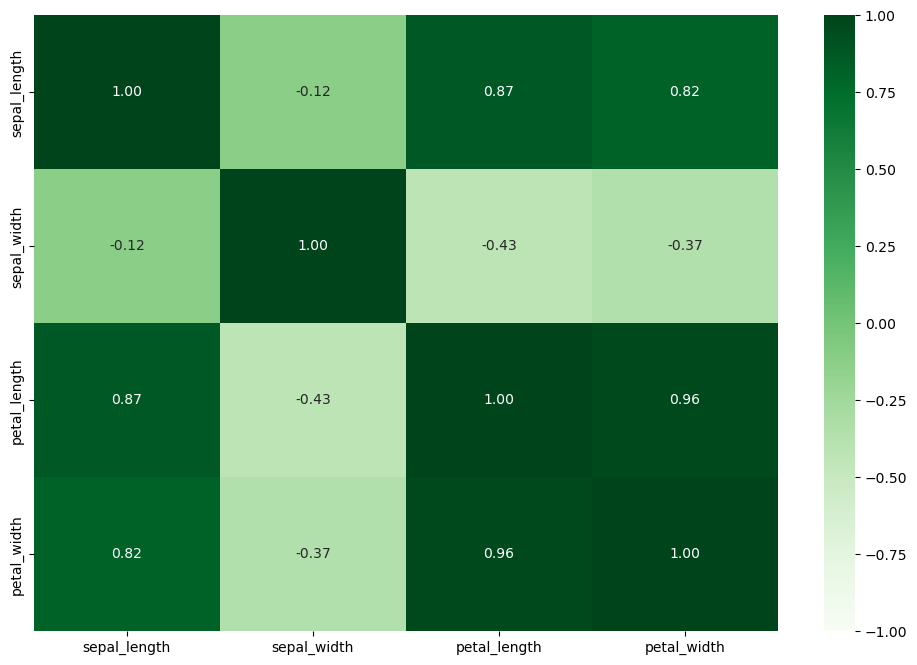

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), vmin=-1, vmax=1,annot=True, fmt='.2f',  cmap= 'Greens')
plt.show()